<a href="https://colab.research.google.com/github/YerMC/LAB_06_MC/blob/main/Gu%C3%ADa_Pr%C3%A1ctica_06_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

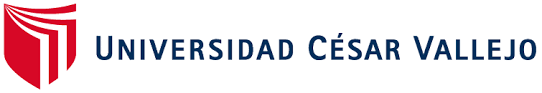

#***Campus Ate - Escuela de Ingeneria de Sistemas***
## SISTEMAS INTELIGENTES - Prof. LUIS ENRIQUE PARAGUAY ARZAPALO
###Alumno: Meza Calderon, Yeral Eder


In [2]:
pip install networkx[default]

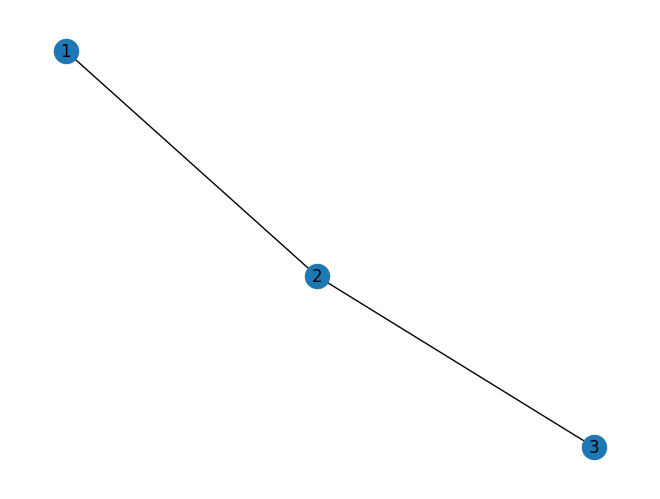

In [6]:
import networkx as nx

G = nx.Graph()

G.add_node(1)
G.add_node(2)
G.add_node(3)

G.add_edge(1, 2)
G.add_edge(2, 3)

nx.draw(G, with_labels=True)

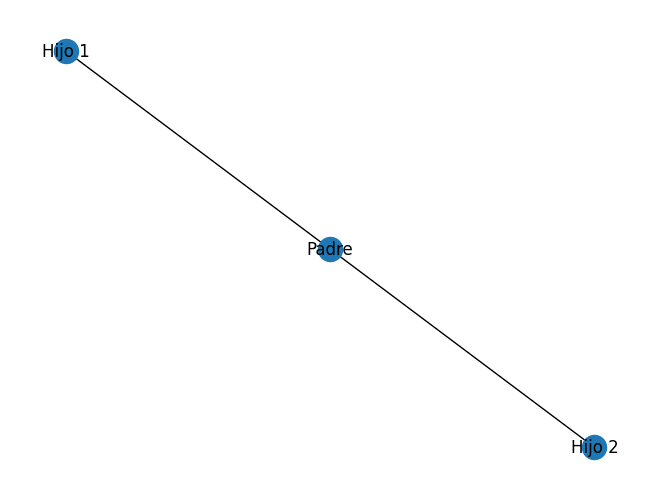

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("Padre")
G.add_node("Hijo 1")
G.add_node("Hijo 2")

G.add_edge("Padre", "Hijo 1")
G.add_edge("Padre", "Hijo 2")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

plt.show()

In [14]:
import heapq
class Nodo:
    def __init__(self, nombre, heuristica):
        self.nombre = nombre
        self.heuristica = heuristica
        self.vecinos = []
    def agregar_vecino (self, vecino, distancia):
        self.vecinos.append((vecino, distancia))
class Grafo:
    def __init__(self):
        self.nodos = {}

    def agregar_nodo(self, nombre, heuristica):
        nodo = Nodo (nombre, heuristica)
        self.nodos [nombre] = nodo
    def agregar_arista(self, origen, destino, distancia):
        self.nodos[origen].agregar_vecino (destino, distancia)
        self.nodos[destino].agregar_vecino (origen, distancia)
    def a_estrella(self, origen, destino):
        if origen not in self.nodos or destino not in self.nodos:
             return None

        cola = []
        heapq.heappush(cola, (0, origen))

        while cola:
            distancia_actual, nodo_actual = heapq.heappop (cola)

            if nodo_actual == destino:
                break

            for vecino, distancia in self.nodos [nodo_actual].vecinos:
                nueva_distancia = distancia_actual + distancia + self.nodos [vecino].heuristica
                heapq.heappush(cola, (nueva_distancia, vecino))
        return distancia_actual


grafo = Grafo()
grafo.agregar_nodo('A', 5)
grafo.agregar_nodo('B', 3)
grafo.agregar_nodo('C', 2)
grafo.agregar_nodo('D', 4)
grafo.agregar_nodo('E', 1)
grafo.agregar_arista('A', 'B', 2)
grafo.agregar_arista('A', 'C', 4)
grafo.agregar_arista ('B', 'D', 3)
grafo.agregar_arista('C', 'D', 1)
grafo.agregar_arista('C', 'E', 5)
grafo.agregar_arista ('D', 'E', 2)
distancia_minima = grafo.a_estrella('A', 'E')
print(distancia_minima)

12


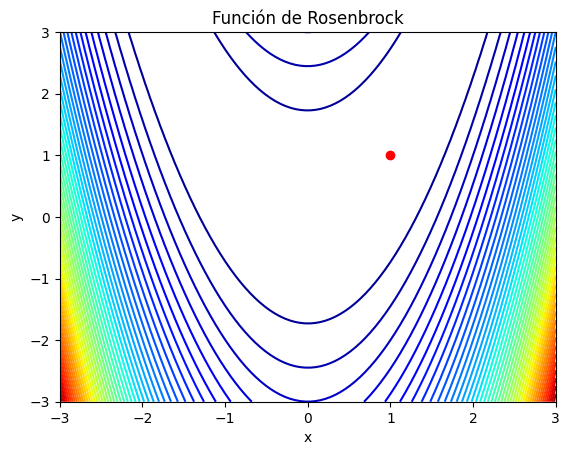

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


def rosenbrock(x):
    return (1 - x[0]) **2 + 100 * (x[1] - x[0]**2)**2


x0 = np.array([-2, 2])
result = optimize.minimize (rosenbrock, x0, method='BFGS')


x = np.linspace (-3, 3, 100)
y = np.linspace (-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])


plt.contour (X, Y, Z, levels=50, cmap='jet')


plt.plot(result.x [0], result.x [1], 'ro')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Función de Rosenbrock')


plt.show()